In [1]:
import os
import json
from config import *
from structure import Structure
from tqdm import tqdm
import pandas as pd
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
from scipy.optimize import nnls, lsq_linear
import random


In [2]:


df = pd.DataFrame()

tables = [
        'environmental_impact',
        'additional_environmental_impact',
        'resource_use',
        'end_of_life_waste',
        'end_of_life_flow']

target_path = os.path.join("../", TARGET_PATH)
output_path = "../data/output"

# Dictionary to store (parameter, module) counts
data = defaultdict(lambda: defaultdict(int))
n = 0
c = 0

with open('../data/dataset/train1000_2025-04-15_sampled.jsonl', 'r') as file:
    lines = list(file)
    random.shuffle(lines)
    for i, line in tqdm(enumerate(lines[:100000])):
            example = json.loads(line)
            target = json.loads(example["messages"][2]["content"])
            try:
                target = Structure.model_validate(target)
            except Exception as e:
                print(f"Error parsing file {target['epd_id']}: {e}")
                c += 1
                continue
        
        #for j in range(min(max(int(np.round(x[i])), 0), 99999)):
            n += 1
            for table in tables:
                parameters = getattr(target, table)
                for parameter in parameters:
                    data[parameter.parameter]["(total)"] += 1
                    for value in parameter.values:
                        # if value.scenario in [None, 'default', 's1', 'S1', 'Standard Scenario', 'Standard-Szenario', 'Standard Szenario', 'Standard scenario', 'standard scenario']:
                        data[parameter.parameter][value.module] += 1
                        # else:
                        #     data[parameter.parameter][f"{value.module}/S2"] += 1
                        

# Convert dictionary to a DataFrame
df = pd.DataFrame(data).fillna(0).astype(int).T

1000it [00:01, 844.31it/s]


In [122]:
df = pd.DataFrame()

tables = [
        'environmental_impact',
        'additional_environmental_impact',
        'resource_use',
        'end_of_life_waste',
        'end_of_life_flow']

target_path = os.path.join("../", TARGET_PATH)
output_path = "../data/output"

# Dictionary to store (parameter, module) counts
data = defaultdict(lambda: defaultdict(int))
oversampling = defaultdict(lambda: defaultdict(list))
unique = defaultdict(lambda: defaultdict(int))
n = 0
c = 0

for i, file_name in tqdm(enumerate(os.listdir(target_path)[:])):
    try:
        target = Structure.parse_file(os.path.join(target_path, file_name))
    except Exception as e:
        print(f"Error parsing file {file_name}: {e}")
        c += 1
        continue
    

    for j in range(min(max(int(np.round(x[i])), 0), 99999)):
        n += 1
        for table in tables:
            parameters = getattr(target, table)
            for parameter in parameters:
                data[parameter.parameter]["(total)"] += 1
                for value in parameter.values:
                    # if value.scenario in [None, 'default', 's1', 'S1', 'Standard Scenario', 'Standard-Szenario', 'Standard Szenario', 'Standard scenario', 'standard scenario']:
                    data[parameter.parameter][value.module] += 1
                    if j == 0:
                        oversampling[parameter.parameter][value.module].append(np.round(x[i]))
                        unique[parameter.parameter][value.module] += 1
                    # else:
                    #     data[parameter.parameter][f"{value.module}/S2"] += 1
                    
        

# Convert dictionary to a DataFrame
df = pd.DataFrame(data).fillna(0).astype(int).T
oversampling_df = pd.DataFrame(oversampling).fillna(0).T
unique_df = pd.DataFrame(unique).fillna(0).T


0it [00:00, ?it/s]

/var/folders/71/fn2hps551dq_wgpxhxlfmkkc0000gn/T/ipykernel_2519/354652306.py:22: PydanticDeprecatedSince20: The `parse_file` method is deprecated; load the data from file, then if your data is JSON use `model_validate_json`, otherwise `model_validate` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  target = Structure.parse_file(os.path.join(target_path, file_name))
6335it [00:10, 623.29it/s]


In [123]:
unique_df

,A1-A3,A4,A5,B1,B2,B3,B4,B5,B6,B7,C1,C2,C3,C4,D,A1,A2,A3
GWP-total,651.0,461.0,414.0,410.0,409.0,408.0,409.0,407.0,407.0,407.0,417.0,415.0,421.0,417.0,424.0,367.0,364.0,366.0
GWP-fossil,313.0,413.0,366.0,362.0,361.0,360.0,361.0,359.0,359.0,359.0,369.0,367.0,373.0,369.0,376.0,330.0,327.0,329.0
GWP-biogenic,313.0,413.0,366.0,362.0,361.0,360.0,361.0,359.0,359.0,359.0,369.0,367.0,373.0,369.0,376.0,330.0,327.0,329.0
GWP-luluc,313.0,413.0,366.0,362.0,361.0,360.0,361.0,359.0,359.0,359.0,369.0,367.0,373.0,369.0,376.0,330.0,327.0,329.0
ODP,651.0,461.0,414.0,410.0,409.0,408.0,409.0,407.0,407.0,407.0,417.0,415.0,421.0,417.0,424.0,367.0,364.0,366.0
AP,649.0,461.0,414.0,410.0,409.0,408.0,409.0,407.0,407.0,407.0,417.0,415.0,421.0,417.0,424.0,367.0,364.0,366.0
POCP,609.0,461.0,414.0,410.0,409.0,408.0,409.0,407.0,407.0,407.0,417.0,415.0,421.0,417.0,424.0,367.0,364.0,366.0
ADPE,651.0,461.0,414.0,410.0,409.0,408.0,409.0,407.0,407.0,407.0,417.0,415.0,421.0,417.0,424.0,367.0,364.0,366.0
ADPF,651.0,461.0,414.0,410.0,409.0,408.0,409.0,407.0,407.0,407.0,417.0,415.0,421.0,417.0,424.0,367.0,364.0,366.0
WDP,313.0,413.0,366.0,362.0,361.0,360.0,361.0,359.0,359.0,359.0,369.0,367.0,373.0,369.0,376.0,330.0,327.0,329.0


In [111]:
oversampling_df_averages = oversampling_df.applymap(lambda x: x if x != 0 else [])
oversampling_df_averages = oversampling_df_averages.applymap(lambda x: sum(x) / len(x) if len(x) > 0 else 0)

/var/folders/71/fn2hps551dq_wgpxhxlfmkkc0000gn/T/ipykernel_2519/1044080669.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  oversampling_df_averages = oversampling_df.applymap(lambda x: x if x != 0 else [])
/var/folders/71/fn2hps551dq_wgpxhxlfmkkc0000gn/T/ipykernel_2519/1044080669.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  oversampling_df_averages = oversampling_df_averages.applymap(lambda x: sum(x) / len(x) if len(x) > 0 else 0)


In [103]:
oversampling_df_averages['A5']['GWP-IOBC']

[]

In [22]:
c

0

In [45]:
#target_value = np.sum((np.round(x)) * (x > 0))
#target_value =  i

df = (df) / n

print(n)

5730


In [ ]:
df

In [65]:
#df.drop(columns=['mean'], inplace=True)
df.loc['(mean)'] = df.mean().astype(float)

rows = ['GWP-total', 'GWP-fossil', 'GWP-biogenic', 'GWP-luluc', 'ODP', 'AP',
       'POCP', 'ADPE', 'ADPF', 'WDP', 'EP-freshwater', 'EP-marine',
       'EP-terrestrial', 'PM', 'ETP-fw', 'HTP-c', 'HTP-nc', 'SQP', 'IRP',
       'PERE', 'PERM', 'PERT', 'PENRE', 'PENRM', 'PENRT', 'SM', 'RSF', 'NRSF',
       'HWD', 'NHWD', 'RWD', 'CRU', 'MFR', 'MER', 'EEE', 'EET', 'FW', 'EP',
       'GWP-IOBC', '(mean)']

columns = ["A1",	"A2",	"A3",	"A1-A3", "A4",	"A5",	"B1",	"B2",	"B3",	"B4",	"B5",	"B6",	"B7",	"C1",	"C2",	"C3",	"C4",	"D",	"(total)"]

df = df[columns]

df = df.loc[rows]

#df = df[sorted(df.columns)]



In [124]:
oversampling_df_averages.loc['(mean)'] = oversampling_df_averages.mean().astype(float)

rows = ['GWP-total', 'GWP-fossil', 'GWP-biogenic', 'GWP-luluc', 'ODP', 'AP',
       'POCP', 'ADPE', 'ADPF', 'WDP', 'EP-freshwater', 'EP-marine',
       'EP-terrestrial', 'PM', 'ETP-fw', 'HTP-c', 'HTP-nc', 'SQP', 'IRP',
       'PERE', 'PERM', 'PERT', 'PENRE', 'PENRM', 'PENRT', 'SM', 'RSF', 'NRSF',
       'HWD', 'NHWD', 'RWD', 'CRU', 'MFR', 'MER', 'EEE', 'EET', 'FW', 'EP',
       'GWP-IOBC', '(mean)']

columns = ["A1",	"A2",	"A3",	"A1-A3", "A4",	"A5",	"B1",	"B2",	"B3",	"B4",	"B5",	"B6",	"B7",	"C1",	"C2",	"C3",	"C4",	"D"]

oversampling_df_averages = oversampling_df_averages[columns]

oversampling_df_averages = oversampling_df_averages.loc[rows]

#df = df[sorted(df.columns)]

unique_df.loc['(mean)'] = unique_df.mean().astype(float)

rows = ['GWP-total', 'GWP-fossil', 'GWP-biogenic', 'GWP-luluc', 'ODP', 'AP',
       'POCP', 'ADPE', 'ADPF', 'WDP', 'EP-freshwater', 'EP-marine',
       'EP-terrestrial', 'PM', 'ETP-fw', 'HTP-c', 'HTP-nc', 'SQP', 'IRP',
       'PERE', 'PERM', 'PERT', 'PENRE', 'PENRM', 'PENRT', 'SM', 'RSF', 'NRSF',
       'HWD', 'NHWD', 'RWD', 'CRU', 'MFR', 'MER', 'EEE', 'EET', 'FW', 'EP',
       'GWP-IOBC', '(mean)']

columns = ["A1",	"A2",	"A3",	"A1-A3", "A4",	"A5",	"B1",	"B2",	"B3",	"B4",	"B5",	"B6",	"B7",	"C1",	"C2",	"C3",	"C4",	"D"]

unique_df = unique_df[columns]

unique_df = unique_df.loc[rows]

/var/folders/71/fn2hps551dq_wgpxhxlfmkkc0000gn/T/ipykernel_2519/1557964372.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  annot_data[df >= threshold] = ""


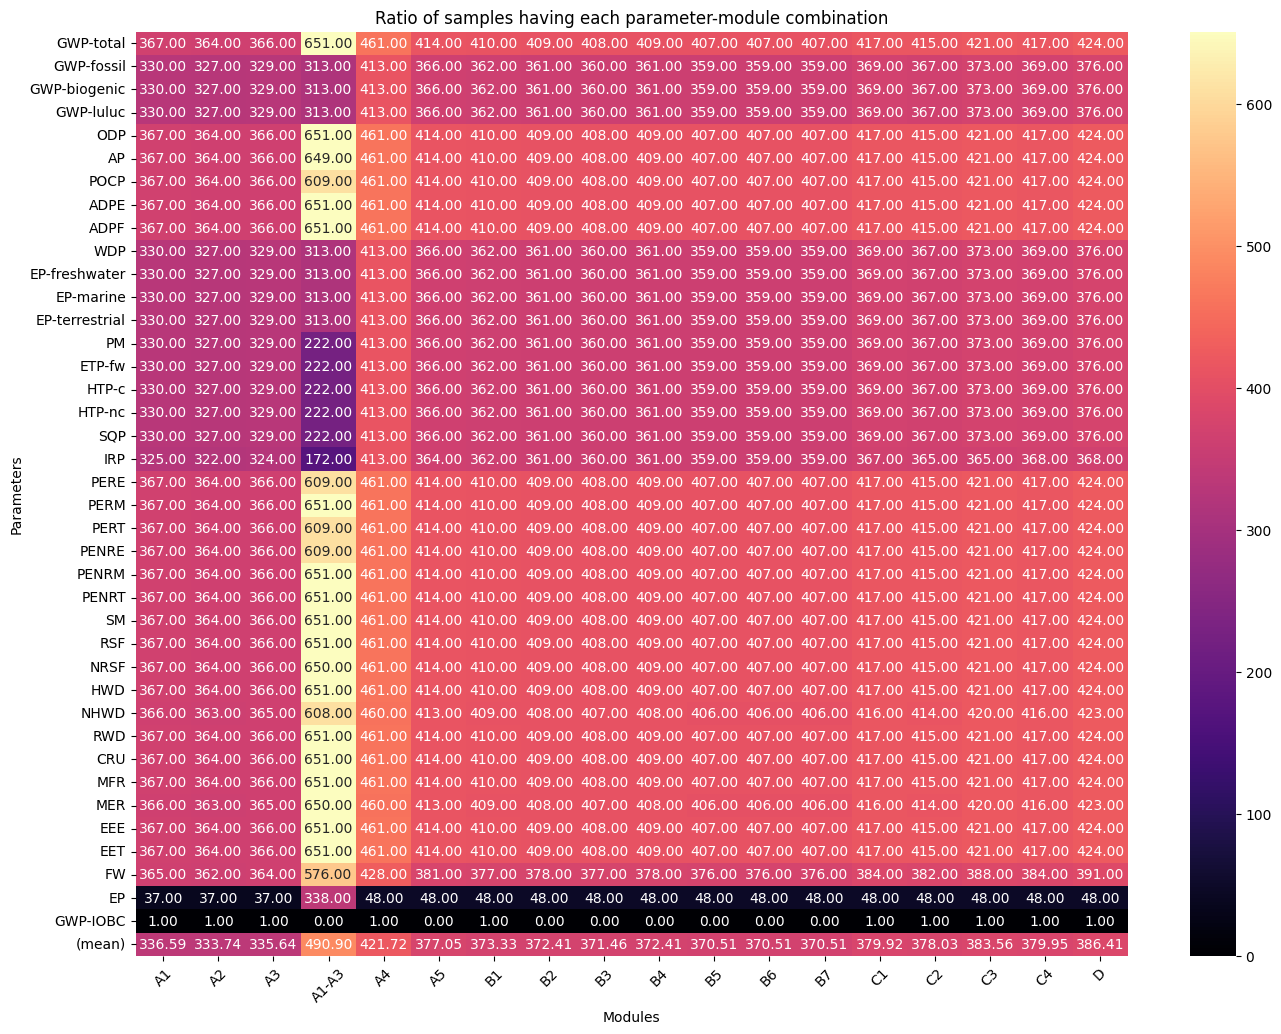

In [127]:



# Set figure size
plt.figure(figsize=(16, 12))


hex_colors = ["#211A52", "#4306DD", "#007FA3", "#FFFFFF"]
#hex_colors = ["#211A52", "#007FA3", "#FFFFFF"]
#hex_colors = ["#211A52", "#4306DD", "#FFFFFF"]
#hex_colors = ["#211A52", "#FFFFFF"]
# Step 2: Create colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", hex_colors, N=256)

threshold = 500

annot_data = df.copy()
annot_data[df >= threshold] = ""
#annot_data[df == None] = 0



# Create heatmap
#sns.heatmap(oversampling_df_averages, annot=annot_data, fmt="", cmap="magma", linewidths=0.0)
#sns.heatmap(df, annot=True, fmt=".2f", cmap="twilight_shifted", linewidths=0.0, vmin=-0.0, vmax=1.0)
#sns.heatmap(oversampling_df_averages, annot=True, fmt=".2f", cmap="magma", linewidths=0.0)
sns.heatmap(unique_df, annot=True, fmt=".2f", cmap="magma", linewidths=0.0)



plt.xticks(rotation=45)
# Set labels
plt.xlabel("Modules")
plt.ylabel("Parameters")
plt.title("Ratio of samples having each parameter-module combination")


#plt.savefig("../figs/parameter_occurrences_solved_test.png", dpi=300, bbox_inches='tight')
#plt.savefig("../figs/parameter_occurrences_pct_FISTA_k3000_lam10_gamma10_min0_max16.png", dpi=300, bbox_inches='tight')
#plt.savefig("../figs/parameter_occurrences_pct.png", dpi=300, bbox_inches='tight')
#plt.savefig("../figs/parameter_occurrences_target.png", dpi=300, bbox_inches='tight')
# Show plot
plt.show()

In [78]:
values = df.values[:-1, :-1]

(702,)

In [82]:
plt.savefig("parameter_occurrences.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [ ]:
# Dictionary to store (table, parameter, module) counts
data = dict()

tables = [
    'environmental_impact',
    'additional_environmental_impact',
    'resource_use',
    'end_of_life_waste',
    'end_of_life_flow'
]

target_path = os.path.join("../", TARGET_PATH)

# # Process the files
# for file_name in tqdm(os.listdir(target_path)):
#     target = Structure.parse_file(os.path.join(target_path, file_name))
    
#     for table in tables:
#         parameters = getattr(target, table)
#         #data[table] = data.get(table, {})
#         for parameter in parameters:
#             data[parameter.parameter] = data.get(parameter.parameter, defaultdict(int))
#             data[parameter.parameter]["(total)"] += 1
#             for value in parameter.values:
#                 data[parameter.parameter][value.module] += 1
                
# Process the files
for i, file_name in tqdm(enumerate(os.listdir(target_path))):
    target = Structure.parse_file(os.path.join(target_path, file_name))
    
    if x[i] == 0:
        continue
    
    for j in range(int(x[i])):    
        for table in tables:
            parameters = getattr(target, table)
            data[table] = data.get(table, {})
            for parameter in parameters:
                data[table][parameter.parameter] = data.get(parameter.parameter, defaultdict(int))
                data[table][parameter.parameter]["(total)"] += 1
                if len(parameter.values) == 0:
                    print(target.epd_id)
                    print(parameter.parameter)
                
                for value in parameter.values:
                    data[table][parameter.parameter][value.module] += 1

In [ ]:
# Dictionary to store (table, parameter, module) counts
data = dict()

tables = [
    'environmental_impact',
    'additional_environmental_impact',
    'resource_use',
    'end_of_life_waste',
    'end_of_life_flow'
]

target_path = os.path.join("../", TARGET_PATH)

# # Process the files
# for file_name in tqdm(os.listdir(target_path)):
#     target = Structure.parse_file(os.path.join(target_path, file_name))
    
#     for table in tables:
#         parameters = getattr(target, table)
#         #data[table] = data.get(table, {})
#         for parameter in parameters:
#             data[parameter.parameter] = data.get(parameter.parameter, defaultdict(int))
#             data[parameter.parameter]["(total)"] += 1
#             for value in parameter.values:
#                 data[parameter.parameter][value.module] += 1
                
# Process the files
for i, file_name in tqdm(enumerate(os.listdir(target_path))):
    target = Structure.parse_file(os.path.join(target_path, file_name))
    
    if x[i] == 0:
        continue
    
    for j in range(round(x[i])):    
        for table in tables:
            parameters = getattr(target, table)
            data[table] = data.get(table, {})
            for parameter in parameters:
                data[table][parameter.parameter] = data.get(parameter.parameter, defaultdict(int))
                data[table][parameter.parameter]["(total)"] += 1
                if len(parameter.values) == 0:
                    print(target.epd_id)
                    print(parameter.parameter)
                
                for value in parameter.values:
                    data[table][parameter.parameter][value.module] += 1





0it [00:00, ?it/s]/var/folders/71/fn2hps551dq_wgpxhxlfmkkc0000gn/T/ipykernel_26580/1821222055.py:29: PydanticDeprecatedSince20: The `parse_file` method is deprecated; load the data from file, then if your data is JSON use `model_validate_json`, otherwise `model_validate` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  target = Structure.parse_file(os.path.join(target_path, file_name))
5979it [00:15, 397.53it/s]


In [180]:
def custom_sort_key(key):
    if key == "(total)":
        return (3, key)  # (total) goes last
    elif key == "A1-A3":
        return (1, key)  # A1-A3 comes right after A3
    elif key in ["A1", "A2", "A3"]:
        return (0, key)
    
    return (2, key)  # Everything else is sorted normally

sorted_data = {
    key: dict(sorted(value.items(), key=lambda item: custom_sort_key(item[0])))
    for key, value in data.items()
}

sorted_data

{'GWP-total': {'A1': 2272,
  'A2': 2261,
  'A3': 2272,
  'A1-A3': 3850,
  'A4': 5107,
  'A5': 3905,
  'B1': 1274,
  'B2': 1183,
  'B3': 884,
  'B4': 919,
  'B5': 462,
  'B6': 1023,
  'B7': 495,
  'C1': 4960,
  'C2': 5269,
  'C3': 5387,
  'C4': 5300,
  'D': 5661,
  '(total)': 6105},
 'GWP-fossil': {'A1': 2061,
  'A2': 2050,
  'A3': 2060,
  'A1-A3': 3075,
  'A4': 4432,
  'A5': 3448,
  'B1': 1147,
  'B2': 1073,
  'B3': 825,
  'B4': 861,
  'B5': 410,
  'B6': 953,
  'B7': 432,
  'C1': 4715,
  'C2': 4824,
  'C3': 4961,
  'C4': 4860,
  'D': 5154,
  '(total)': 5122},
 'GWP-biogenic': {'A1': 2061,
  'A2': 2050,
  'A3': 2060,
  'A1-A3': 3075,
  'A4': 4432,
  'A5': 3448,
  'B1': 1147,
  'B2': 1073,
  'B3': 825,
  'B4': 861,
  'B5': 410,
  'B6': 953,
  'B7': 432,
  'C1': 4715,
  'C2': 4824,
  'C3': 4961,
  'C4': 4860,
  'D': 5154,
  '(total)': 5122},
 'GWP-luluc': {'A1': 2061,
  'A2': 2050,
  'A3': 2060,
  'A1-A3': 3075,
  'A4': 4432,
  'A5': 3448,
  'B1': 1147,
  'B2': 1073,
  'B3': 825,
  'B4': 

In [183]:
with open("../figs/parameter_occurrences_without_table.json", "w") as f:
    # Convert DataFrame to JSON and write to file
    json.dump(sorted_data, f)

In [165]:
with open("parameter_occurrences.json", "w") as f:
    # Convert DataFrame to JSON and write to file
    json.dump(json.loads(df.to_json()), f)

In [3]:
df = pd.DataFrame()

tables = [
        'environmental_impact',
        'additional_environmental_impact',
        'resource_use',
        'end_of_life_waste',
        'end_of_life_flow']

target_path = os.path.join("../", TARGET_PATH)

# Dictionary to store (parameter, module) counts

modules = ["A1",	"A2",	"A3",	"A1-A3", "A4",	"A5",	"B1",	"B2",	"B3",	"B4",	"B5",	"B6",	"B7",	"C1",	"C2",	"C3",	"C4",	"D"]
parameters = ['GWP-total', 'GWP-fossil', 'GWP-biogenic', 'GWP-luluc', 'ODP', 'AP',
       'ADPE', 'ADPF', 'WDP', 'EP-freshwater', 'EP-marine', 'EP-terrestrial',
       'PM', 'ETP-fw', 'HTP-c', 'HTP-nc', 'SQP', 'IRP', 'PERM', 'PENRM',
       'PENRT', 'SM', 'RSF', 'NRSF', 'HWD', 'RWD', 'CRU', 'MFR', 'MER', 'EEE',
       'EET', 'POCP', 'GWP-IOBC', 'PERE', 'PERT', 'PENRE', 'FW', 'NHWD', 'EP']


base_df = pd.DataFrame(index=parameters, columns=modules).fillna(0).astype(int)


epd_list = []

for file_name in tqdm(os.listdir(target_path)):
    df = base_df.copy()
    target = Structure.parse_file(os.path.join(target_path, file_name))
    for table in tables:
        parameters = getattr(target, table)
        for parameter in parameters:
            for value in parameter.values:
                df[value.module][parameter.parameter] += 1
                
    epd_list.append(df.values)


/var/folders/71/fn2hps551dq_wgpxhxlfmkkc0000gn/T/ipykernel_2519/1573459751.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base_df = pd.DataFrame(index=parameters, columns=modules).fillna(0).astype(int)
  0%|          | 0/6335 [00:00<?, ?it/s]

/var/folders/71/fn2hps551dq_wgpxhxlfmkkc0000gn/T/ipykernel_2519/1573459751.py:29: PydanticDeprecatedSince20: The `parse_file` method is deprecated; load the data from file, then if your data is JSON use `model_validate_json`, otherwise `model_validate` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  target = Structure.parse_file(os.path.join(target_path, file_name))
/var/folders/71/fn2hps551dq_wgpxhxlfmkkc0000gn/T/ipykernel_2519/1573459751.py:34: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a 

In [41]:
A = np.array([E.flatten() for E in epd_list]).T

K = 3000
b = np.ones(A.shape[0]) * K

In [27]:



# #bounds = (1, np.inf)
# x, r = nnls(A, b)
# #x, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)


# print(sum([v > 0.0 for v in x]))
# print(sum([min(v, 99999999) * (v > 0.0) for v in x]))
# print(np.median(x))
# print(np.mean(x))
# print(np.std(x))
# print(np.max(x))
# print(np.min(x))
# print(np.sort(x)[-40:])


In [30]:

print(sum([np.round(v) > 0.0 for v in x]))
print(sum([np.ceil(v) > 0.0 for v in x]))

zeros = sum([np.round(v) <= 0 for v in x])
sparcity = zeros / len(x)

uniformity = sum([(v - 1) ** 2 for v in x]) / len(x)

print("sparcity: ", sparcity)
print("uniformity: ", uniformity)
print("sum: ", np.sum(x))
print("median: ", np.median(x))
print("mean: ", np.mean(x))
print("std: ", np.std(x))
print("variance: ", np.var(x))
print("max: ", np.max(x))
print("min: ", np.min(x))
print(np.sort(x)[-100:])
print(np.round(x[:100]))


1766
2319
sparcity:  0.7212312549329124
uniformity:  2.6274702507584613
sum:  5944.031855133324
median:  -0.012750146297820071
mean:  0.9382844285924742
std:  1.6197720330355843
variance:  2.62366143900423
max:  4.0574722810125845
min:  -0.1136391214451102
[4.04261767 4.04261767 4.04261767 4.04261767 4.04261767 4.04261767
 4.04261767 4.04261767 4.04261767 4.04261767 4.04261767 4.04261767
 4.04261767 4.04261767 4.04261767 4.04261767 4.04261767 4.04261767
 4.04261767 4.04261767 4.04261767 4.04261767 4.04261767 4.04261767
 4.04261767 4.04261767 4.04261767 4.04261767 4.04261767 4.04261767
 4.04261767 4.04261767 4.04261767 4.04261767 4.04261767 4.04261767
 4.04261767 4.04261767 4.04261767 4.04261767 4.04261767 4.04261767
 4.04261767 4.04261767 4.04261767 4.04261767 4.04261767 4.04261767
 4.04261767 4.04261767 4.04261767 4.04261767 4.04261767 4.04261767
 4.04261767 4.04261767 4.04261767 4.04261767 4.04261767 4.04261767
 4.04261767 4.04261767 4.04261767 4.04261767 4.04261767 4.04261767
 4.042

[-6.31192750e-05 -1.86644160e-04 -6.31192750e-05 ...  4.53767398e-04
 -5.40281490e-04  7.81292745e+00]


In [109]:
import cvxpy as cp

upper_bound = 16
lam = 10
gamma = 10
n = A.shape[1] # Number of EPDs

# Variable
x = cp.Variable(n)  # non-negative constraint

# Constraints
constraints = [x >= 0, x <= upper_bound]

# Objective
objective = cp.Minimize(cp.sum_squares(A @ x - b) + lam * cp.sum_squares(x) + gamma * (cp.sum(x) -  2 * K) ** 2)

# Problem
problem = cp.Problem(objective, constraints)

# Solve using SCS (uses FISTA-like algorithm under the hood)
problem.solve(solver=cp.SCS, verbose=True, max_iters=2000)  # or try solver=cp.OSQP

print("Optimal x:", x.value)

x = x.value

                                     CVXPY                                     
                                     v1.6.4                                    
(CVXPY) Apr 17 12:12:56 PM: Your problem has 6335 variables, 12670 constraints, and 0 parameters.
(CVXPY) Apr 17 12:12:56 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 17 12:12:56 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Apr 17 12:12:56 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Apr 17 12:12:56 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Apr 17 12:12:56 PM: Compiling problem (target solver=SCS).

/Users/emilschneiderlorentzen/UNI/6sm/project/open_ai_structured_output/.venv/lib/python3.12/site-packages/cvxpy/problems/problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [36]:
x = x.value

In [207]:
import cvxpy as cp

x = cp.Variable(A.shape[1])
objective = cp.Minimize(cp.sum_squares(A @ x - b) + 0.1 * cp.sum_squares(x) + )
constraints = [x >= 0]
problem = cp.Problem(objective, constraints)
problem.solve()

SolverError: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.